# Word Embeddings

## ¿Cómo representamos palabras, oraciones y significados en NLP?

## ¿Qué es una palabra?


![](img/words.png)

Cuando hablamos de palabras, podemos distinguir dos conceptos diferentes:

- **ocurrencia** (*token*) se refiere a una observación de una palabra en una cadena de texto. 

    Como hemos visto, en algunas lenguas es más o menos complejo identificar los límites de las palabras, pero en la mayoría de las lenguas occidentales y de nuestro entorno se utilizan espacios y otros signos de puntuación para delimitar las palabras.

- **tipo** (*type*) es la representación abstracta de una palabra. Cad **ocurrencia** pertenece a un **tipo** de palabra. Cuando contamos la frecuencia de las palabras de un *corpus* o colección de textos, lo que hacemos es contar el número de ocurrencias que tiene cada tipo.

In [ ]:
from nltk import word_tokenize

texts = [
    """No hubo sorpresa en Bruselas. 621 votos a favor, 49 en contra (los 'remainers' británicos entre ellos) y 13 abstenciones.""",
    """'The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced "no evidence" that any irregularities took place.'""",
    """環太平洋造山帯に属する小スンダ列島の西端に位置している。""",
]

for text in texts:
    print(word_tokenize(text))

In [ ]:
tweets = [
    """🎉¡#SORTEO! Gana una tostadora YummyToast Double. 🎁 
▪️Síguenos. 
▪️Comenta mencionando a 2 amigos junto a #Cecotec.
Tienes hasta el 9 de febrero para participar. El regalo se sorteará aleatoriamente entre los participantes. ¡Mucha suerte!.""",
    """we play for y’all 🏀‼️🖤 https://t.co/sd12vW93 #MambaMentality""",
]

for tweet in tweets:
    print(word_tokenize(tweet))

In [ ]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()

for text in texts:
    print(tokenizer.tokenize(text))

for tweet in tweets:
    print(tokenizer.tokenize(tweet))

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

for text in texts + tweets:
    print(tokenize(text))

Veamos qué tipo de tokenización se prefiere cuando son humanos los que segmentan las palabras: el [corpus de Brown](https://en.wikipedia.org/wiki/Brown_Corpus) en inglés, o [Ancora](http://clic.ub.edu/corpus/es) en español.

In [ ]:
from nltk.corpus import brown

brown_sents = brown.tagged_sents(categories="news")
for sentence in brown_sents[:3]:
    print([token for token, _tag in sentence])

In [ ]:
from nltk.corpus import cess_esp

ancora_sents = cess_esp.tagged_sents()
for sentence in ancora_sents[:3]:
    print([token for token, _tag in sentence])

## Representaciones discretas: Cadenas o Números enteros

A partir de aquí vamos a asumir que tenemos solucionado el proceso de tokenización e identificación de lo que es una palabra. ¿Cómo continuamos?

La manera más sencilla de representar una palabra es como una cadena, es decir, como una secuencia ordenada de caracteres. Esto es cómodo, pero implica dos cosas:

- La cantidad de memoria que ocupa cada cada palabra varía en función de la longitud :-/

- Comprobar si dos palabras son idénticas es un proceso lento :-(

Otra opción alternativa consiste en representar las palabras como números enteros, de manera que a cada palabra se le asigna de manera más o menos arbitraria un número entero positivo.

![](img/words-indexes.jpg)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

tweets_tokens = []
tweets_tokens.extend([tokenize(tweet) for tweet in tweets][0])
print(tweets_tokens)

In [ ]:
label_encoder = LabelEncoder()

tokens_int = label_encoder.fit_transform(tweets_tokens)

token2int = dict(zip(tweets_tokens, tokens_int))
print(token2int)

Este tipo de representación se caracteriza porque:

- Todos las palabras ocupan la cantidad de memoria.

- Comprobar si dos cadenas son la misma palabra es rápido :-)

- Estos identificadores arbitrarios no significan nada :-(

- No hay manera de relacionar palabras similares atendiendo a su identificador :-(

## Palabras como Vectores *one hot*

Cuando tenemos un mapeo como el anterior entre palabras y enteros, podemos representar cada palabra como un vector *one hot* de $n$ dimensiones, donde $n$ es el tamaño de vocabulario que manejamos. Estos vectores contendrán $0$ en todas sus dimensiones excepto en la posición que coincida con el índice de la palabra en el vocabulario, que contendrá un $1$.

![](img/one-hot-vectors.png)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)

tokens_int = tokens_int.reshape(len(tokens_int), 1)
onehot_tokens = onehot_encoder.fit_transform(tokens_int)

print(onehot_tokens)

print(onehot_tokens[token2int["suerte"]])

In [ ]:
from keras.utils import to_categorical

onehot_tokens = to_categorical(tokens_int)

print(onehot_tokens)
print(onehot_tokens[token2int["suerte"]])

Esta representación en realidad no es muy diferente de la de representar palabras como enteros. Y aunque es muy útil en otros contextos, como cuando queremos codificar datos categóricos, aquí nos enfrentamos a un problema de dispersión y de espacio requerido para almacenar un vocabulario entero.

El inconveniente más grave de este tipo de representación es la falta de **similitud**. Es imposible detectar dos palabras con significados relacionados. 

De hecho, una técnica habitual para medir la similitud entre dos vectores es calcular el **producto escalar**. Como cualquier par de vectores de este tipo son ortogonales, cualquier producto da como resultado $0$.

Vectorizar colecciones de documentos es una práctica habitual. Veamos un ejemplo:

In [ ]:
import numpy as np

from sklearn.datasets import fetch_20newsgroups

categories = ["comp.windows.x", "rec.sport.baseball", "sci.space", "talk.religion.misc"]
remove = ("headers", "footers", "quotes")

newsgroups_train = fetch_20newsgroups(
    subset="train", categories=categories, remove=remove
)

newsgroups_train.filenames.shape

In [ ]:
for doc in newsgroups_train.data[:3]:
    print(doc[:300])
    print("-" * 100)

for doc in newsgroups_train.data[-3:]:
    print(doc[:300])
    print("-" * 100)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words="english")

vectors = vectorizer.fit_transform(
    newsgroups_train.data
).todense()  # (documents, vocab)

vectors.shape

Hemos convertido la collección de documentos en una matriz de datos donde los documentos se representan como vectores de enteros.

![](img/vectorized-docs.png)

In [ ]:
vectors.shape

In [ ]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

In [ ]:
print(vocab[:50])

In [ ]:
print(vocab[20000:20050])

In [ ]:
print(vocab[-50:])

## Palabras como Vectores Densos

La verdad es que hoy en día nunca se representamos las palabras como elementos discretos principalmente por un motivo: muchas veces no necesitaremos comprobar no si dos palabras son iguales, como mencionábamos antes, pero sí si dos palabras son *similares*. Calcular la **similitud** entre dos pares de palabras/oraciones/documentos es crucial para muchas tareas de NLP.

### ¿Qué significa **similitud**?

La idea de similitud implica que dos palabras tienen algún tipo de relación desde el punto de vista del significado, no necesariamente de sinonimia. Que dos palabras sean similares no implica que sean intercambiables en cualquier situación, pero sí que suelen aparecer en los mismos contextos.

- Dos adjetivos aparentemente contrarios (p. ej. *blanco* y *negro*) son similares porque se pueden aplicar a los mismos objetos. 
- Un término general y otro más específico (p. ej. *perro* y *caniche*) son similares también. 
- Una parte constitutiva y el todo (p. ej. *dedo* y *mano*) son similares.

Históricamente, ha habido distintos intentos de codificar de manera explícita estas relaciones de similitud a mano. Desde el punto de vista Semántica, el ejemplo más famoso es [Wordnet](https://wordnet.princeton.edu/), una base de datos léxica que almacena palabras, sus significados y las relaciones semánticas que se establecen entre ellas de manera jerárquica. En otras partes de la lingüísitica, como en la Sintaxis, se estudia la estructura del lenguaje y agrupa las palabras similares bajo clases de palabras o categorías como *nombre*, *verbo*, *adjetivo*, etc. 

A partir de cualquiera de estas dos vertientes, o más bien, combinando ambas, podemos llegar a la idea de representar una palabra como un vector. Y podemos elegir la dimensionalidad que mejor se ajuste a nuestros intereses:


- Como hemos visto antes, podemos crear representaciones *one hot*: a cada palabra se le asigna a una dimensión, de manera que el vector resultante contendrá un $1$ en esa dimensión concreta y el resto de palabras tendra un $0$.

- Si tenemos una colección de palabras que pertenezcan a una misma categoría (p. ej., verbos, o meses del año), podemos codificar esa pertenencia a la clase asignando un valor binario. 

- Para formas de palabras (variaciones morfológicas) que pertenecen a la misma palabra podemos reservar una dimensión concreta y asignársela como clase. De este modo, *canto*, *cantaba*, *cantado*, *cantaría* y el resto de formas del verbo *cantar* tendrían un $1$, mientras que el resto de palabras tendrían un $0$.

- Podemos condificar como dimensiones otras características formales como el hecho de contener dígitos, letras mayúsculas, etc.

- Podemos codificar las propiedades de los objetos a los que hacen referencia las palabras como dimensiones. Pensemos por ejemplo en el peso o la longitud. Para la palabra *elefante* podríamos codificar su peso como $6000$ y el de *hormiga* como $0.002$.

![](img/manual-features.jpg)

![](img/simplistic-term-vector-mode.gif)

El término técnico para referirse a estas dimensiones es *features*. Estas *features* pueden designarse a mano o pueden derivarse del uso de algoritmos automáticos.  

Más rencientemente, se ha desarrollado una tendencia (hasta convertirse en dominante) consistente en extraer este tipo de relaciones de manera automática, a través del procesamiento de ingentes colecciones de textos y el análisis de cada palabra en su contexto de aparición.



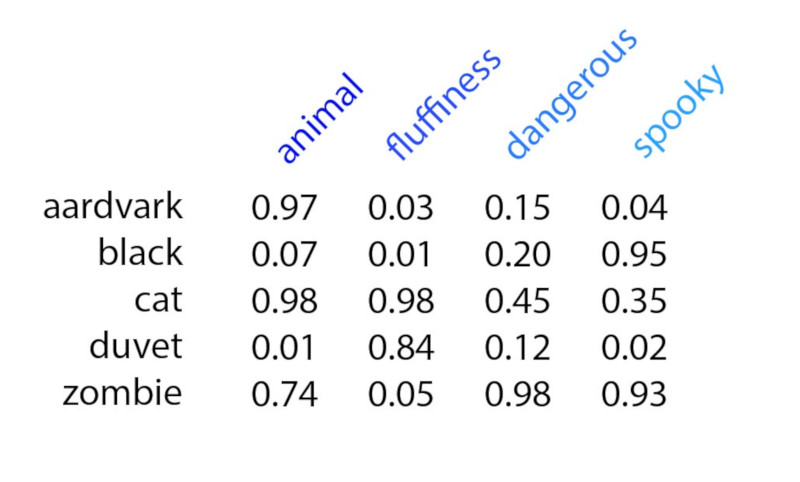
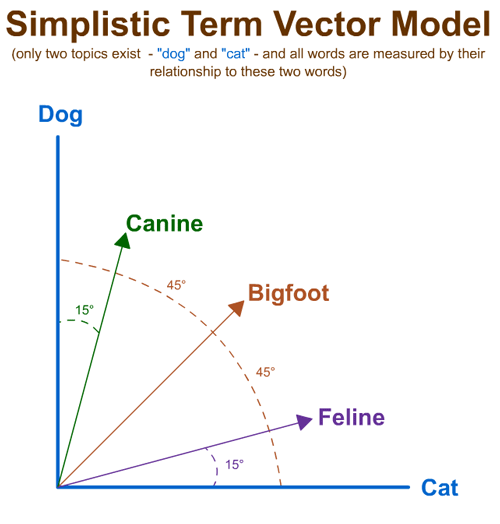

## Palabras como vectores distribucionales

> “You shall know a word by the company it keeps.”
> — John R. Firth (1957)
>
>“The meaning of a word is its use in the language (…) One cannot guess how a word functions. One has to look at its use, and learn from that.”
>— Ludwig Wittgenstein (1953)


La idea de que podemos analizar el uso de las palabras para deducir sus significado es una idea fundamental en semántica distribucional: la hipótesis distribucional. 

## word2vec: Computing continuous distributed representations of words

En 2013, Mikolov propuso [word2vec](https://code.google.com/archive/p/word2vec/), un algoritmo para aprender embeddings de palabras de manera automática. El proceso consistía en tomar una colección de documentos lo suficientemente grande y representativa de una lengua y aplicar una red neuronal con dos posibles objetivos:

1. tratar de predecir el contexto de aparición a partir de una palabra (**skip-gram**)
2. utilizar el contexto para predecir la palabra en cuestión (**CBOW**: *continuous bag-of-words*)

El resultado final es que el algoritmo aprende a generar *embeddings* de manera no supervisada (o autosupervisada), mapeos entre palabras y vectores densos de números reales que parecen capturar interesantes propiedades lingüísticas, desde el punto de vista semántico y también morfo-sintáctico.

    París - France + España ≈ Madrid

    comimos - comer + andar ≈ anduvimos


## GloVe: Global Vectors for Word Representation

En 2014, Pennington del grupo de NLP de la Universidad de Stanford presentó [GloVe](https://nlp.stanford.edu/projects/glove/), otro algoritmo no supervisado para generar representaciones vectoriales de palabras. 

En este caso, el procedimiento consiste en procesar grandes cantidades de muestras de lengua real y extraer relaciones entre palabras atendiendo a la frecuencia con la que cada par de términos co-ocurren en un corpus. 

## fastText: Enriching Word Vectors with Subword Information

word2vec y GloVe tienen un problema: solo aprenden *embeddings* para las palabras que aparecen de manera explícita en el corpus utilizado para el entrenamiento y, en consecuencia, no generar representaciones para palabras raras o desconocidas. ¿Qué hacemos entonces con las *out-of-vocabulary (OOV) words*?

- se ignoran
- se representan como un vector de ceros
- se representan como el vector promedio del resto de embeddings

fastText (Bojanowski et al., 2016) describe un método para aprender vectores, no de palabras, sino de n-gramas o secuencias de caracteres sucesivos. El embedding de cada palabra se calcula como la suma de los vectores de todos sus constituyentes.

La principal ventaja es que ahora sí vamos a poder representar erratas y palabras raras. Además, [está disponible en 157 lenguas del mundo](https://fasttext.cc/docs/en/crawl-vectors.html).

## Referencias:


- [An intuitive explanation of word2vec](https://towardsdatascience.com/an-intuitive-explanation-of-word2vec-208bed0a0599)
- [Arithmetic Properties of Word Embeddings](https://medium.com/data-from-the-trenches/arithmetic-properties-of-word-embeddings-e918e3fda2ac)
- [Contextual Word Representations: A Contextual Introduction](https://arxiv.org/abs/1902.06006)
- [Intuition & Use-Cases of Embeddings in NLP & beyond](https://www.youtube.com/watch?v=4-QoMdSqG_I)
- [Using Word2vec for Music Recommendations](https://towardsdatascience.com/using-word2vec-for-music-recommendations-bb9649ac2484)
- [Why do we use word embeddings in NLP?](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2)
